# Titanic Dataset Review
**Author:** Gabriel Richards (gjrich)

**Date:** 4 Apr 2025

**Objective:** This notebook is a review of the Titanic dataset to look at the passengers of the famous ship that struck an iceberg and sunk. At the end we conduct a test-train-split to prepare the dataset for Machine Learning in later modules.


## 1. Imports and Basic Review
In the code cell below, we import the necessary Python libraries for this notebook.  

In [1]:
import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

Display basic information about the dataset using the info() method.

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Display the first 10 rows.  If not the last statement in a Python cell, you'll have to wrap in the print() function to display. 



In [4]:
print(titanic.head(10))


   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

Check for missing values using the isnull() method and then the sum() method. 

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Display summary statistics using the describe() method

In [6]:
print(titanic.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Check for correlations using the corr() method and tell it to use only the numeric features. 



In [7]:
print(titanic.corr(numeric_only=True))


            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions
Since Titanic contains both numeric and categorical variables, we'll use only numeric values here.

Create a scatter plot of age vs fare, colored by gender:

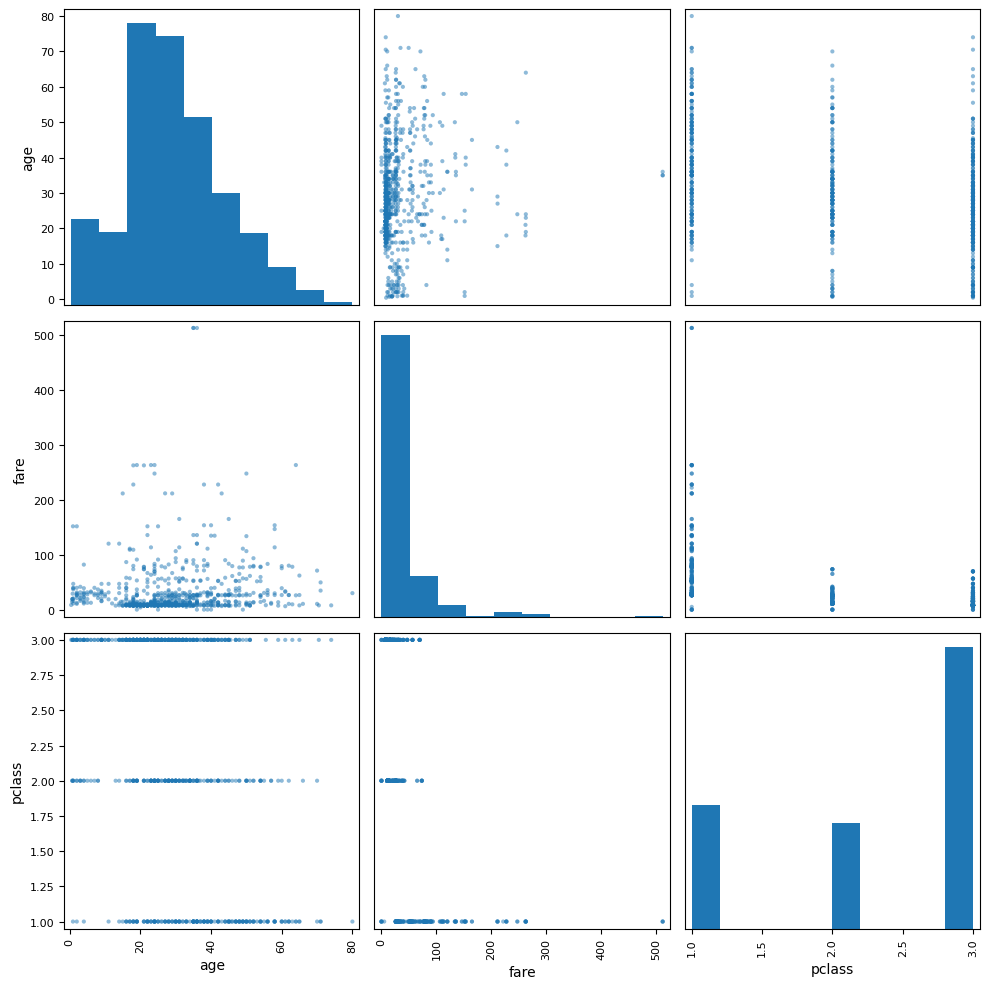

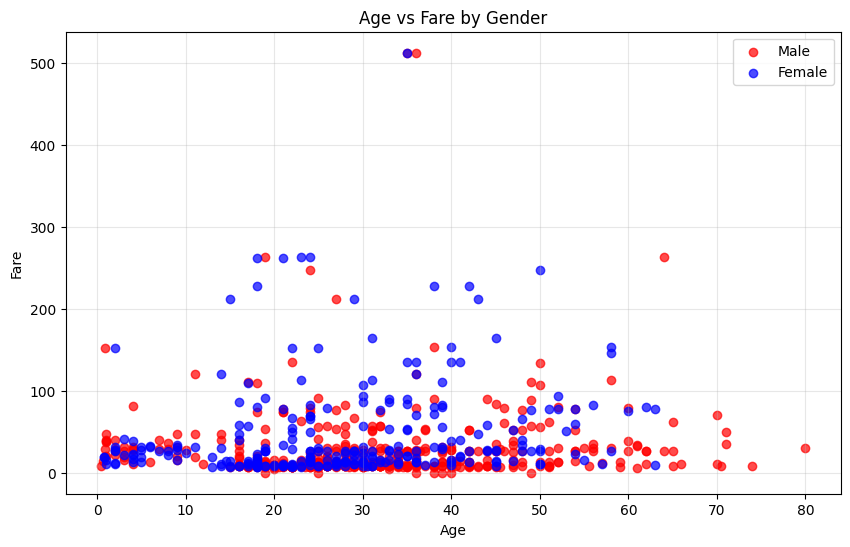

In [8]:
# First visualization - Scatter matrix
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))

# Create scatter plots for each gender separately
males = titanic[titanic['sex'] == 'male']
females = titanic[titanic['sex'] == 'female']

# Plot males in red, females in blue
plt.scatter(males['age'], males['fare'], color='red', alpha=0.7, label='Male')
plt.scatter(females['age'], females['fare'], color='blue', alpha=0.7, label='Female')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Histogram of age

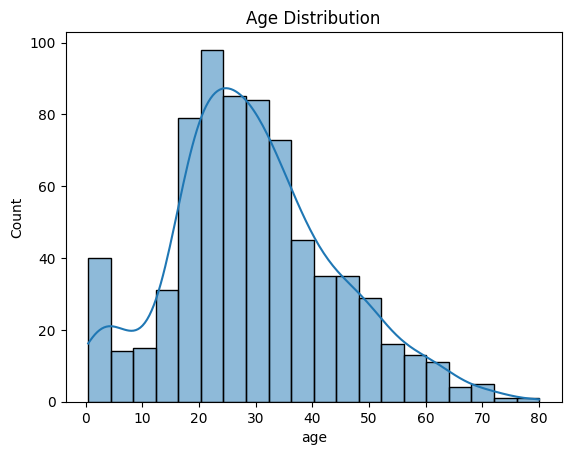

In [9]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

### Count plot for class and survival

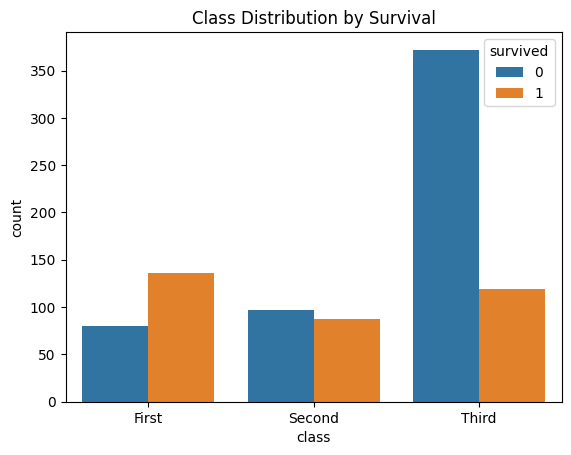

In [10]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

### 2.2 Handle Missing Values and Clean Data

Impute missing values for age using the median & Fill in missing values for embark_town using the mode

In [11]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])


### 2.3 Feature Engineering

Create new features:

- Add family_size - number of family members on board
- Convert categorical "sex" to numeric
- Convert categorical "embarked" to numeric
- Binary feature - convert "alone" to numeric

In [12]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Use survived as the target. 
We will do three input cases like the example. 

First:
- input features: alone
- target: survived

Second:
- input features - age (or another variable of your choice)
- target: survived

Third:
- input features -  age and family_size (or another combination of your choice)
- target: survived

### 3.2 Define X and y

- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time
- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series

In [ ]:
# Case selector 
case = 2  # Change this value to select different cases: 1, 2, or 3
# can add other cases in the future

# Set X and y based on case selection
if case == 1:
    # Case 1: alone only
    X = titanic[['alone']]
    y = titanic['survived']
elif case == 2:
    # Case 2: age only
    X = titanic[['age']]
    y = titanic['survived']
elif case == 3:
    # Case 3: age + family_size
    X = titanic[['age', 'family_size']]
    y = titanic['survived']
else:
    # Handle invalid case selection
    print("Invalid case selection. Please choose 1, 2, or 3.")
    # Default to case 1
    X = titanic[['alone']]
    y = titanic['survived']

### 3.2 Reflection

#### Why are these features selected?
To compare how people survived between those alone, or with families of varying sizes. Additionally to review how age impacted survival.

#### Are there any features that are likely to be highly predictive of survival?
Many! Passenger class and sex, as examples.

## Section 4. Splitting

Here, we split the data into Split the data into training and test sets StratifiedShuffleSplit. 

For the Stratified Split, it distributes the rows into a similar 80/20 split, but ensuring that each set has a similar distribution for survival as the original distribution.

### 4.1 Stratified Train/Test split
Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.



In [14]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print(f"Currently testing Case {case} ")
print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Currently testing Case 1 
Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [15]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data

In [16]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print(f"Results for Case {case} Decision Tree on training data:")
print(classification_report(y_train, y_pred))  

Results for Case 1 Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



Evaluate model performance on test data:

In [17]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print(f"Results for Case {case} Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Case 1 Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix:

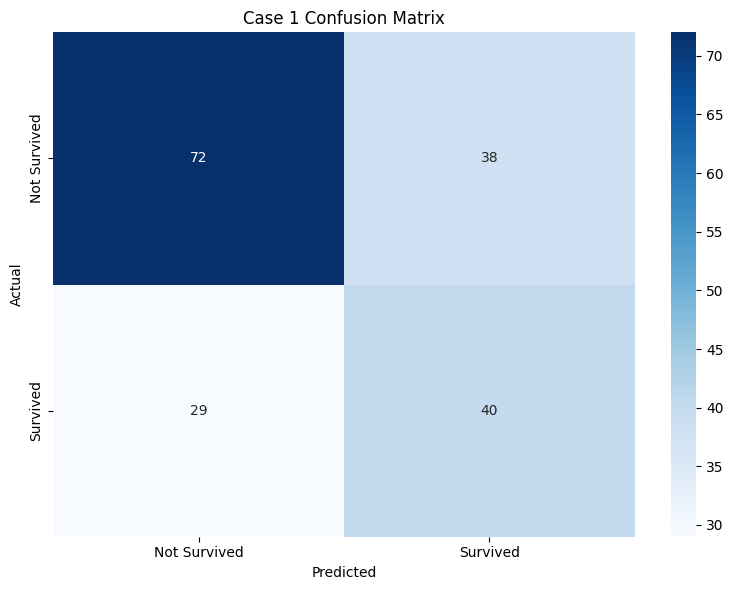

In [18]:
# Create improved confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)

# Create more descriptive labels
class_labels = ['Not Survived', 'Survived']

# Plot with better labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Case {case} Confusion Matrix')
plt.tight_layout()
plt.show()

### 4.5 Report Decision Tree Plot
Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

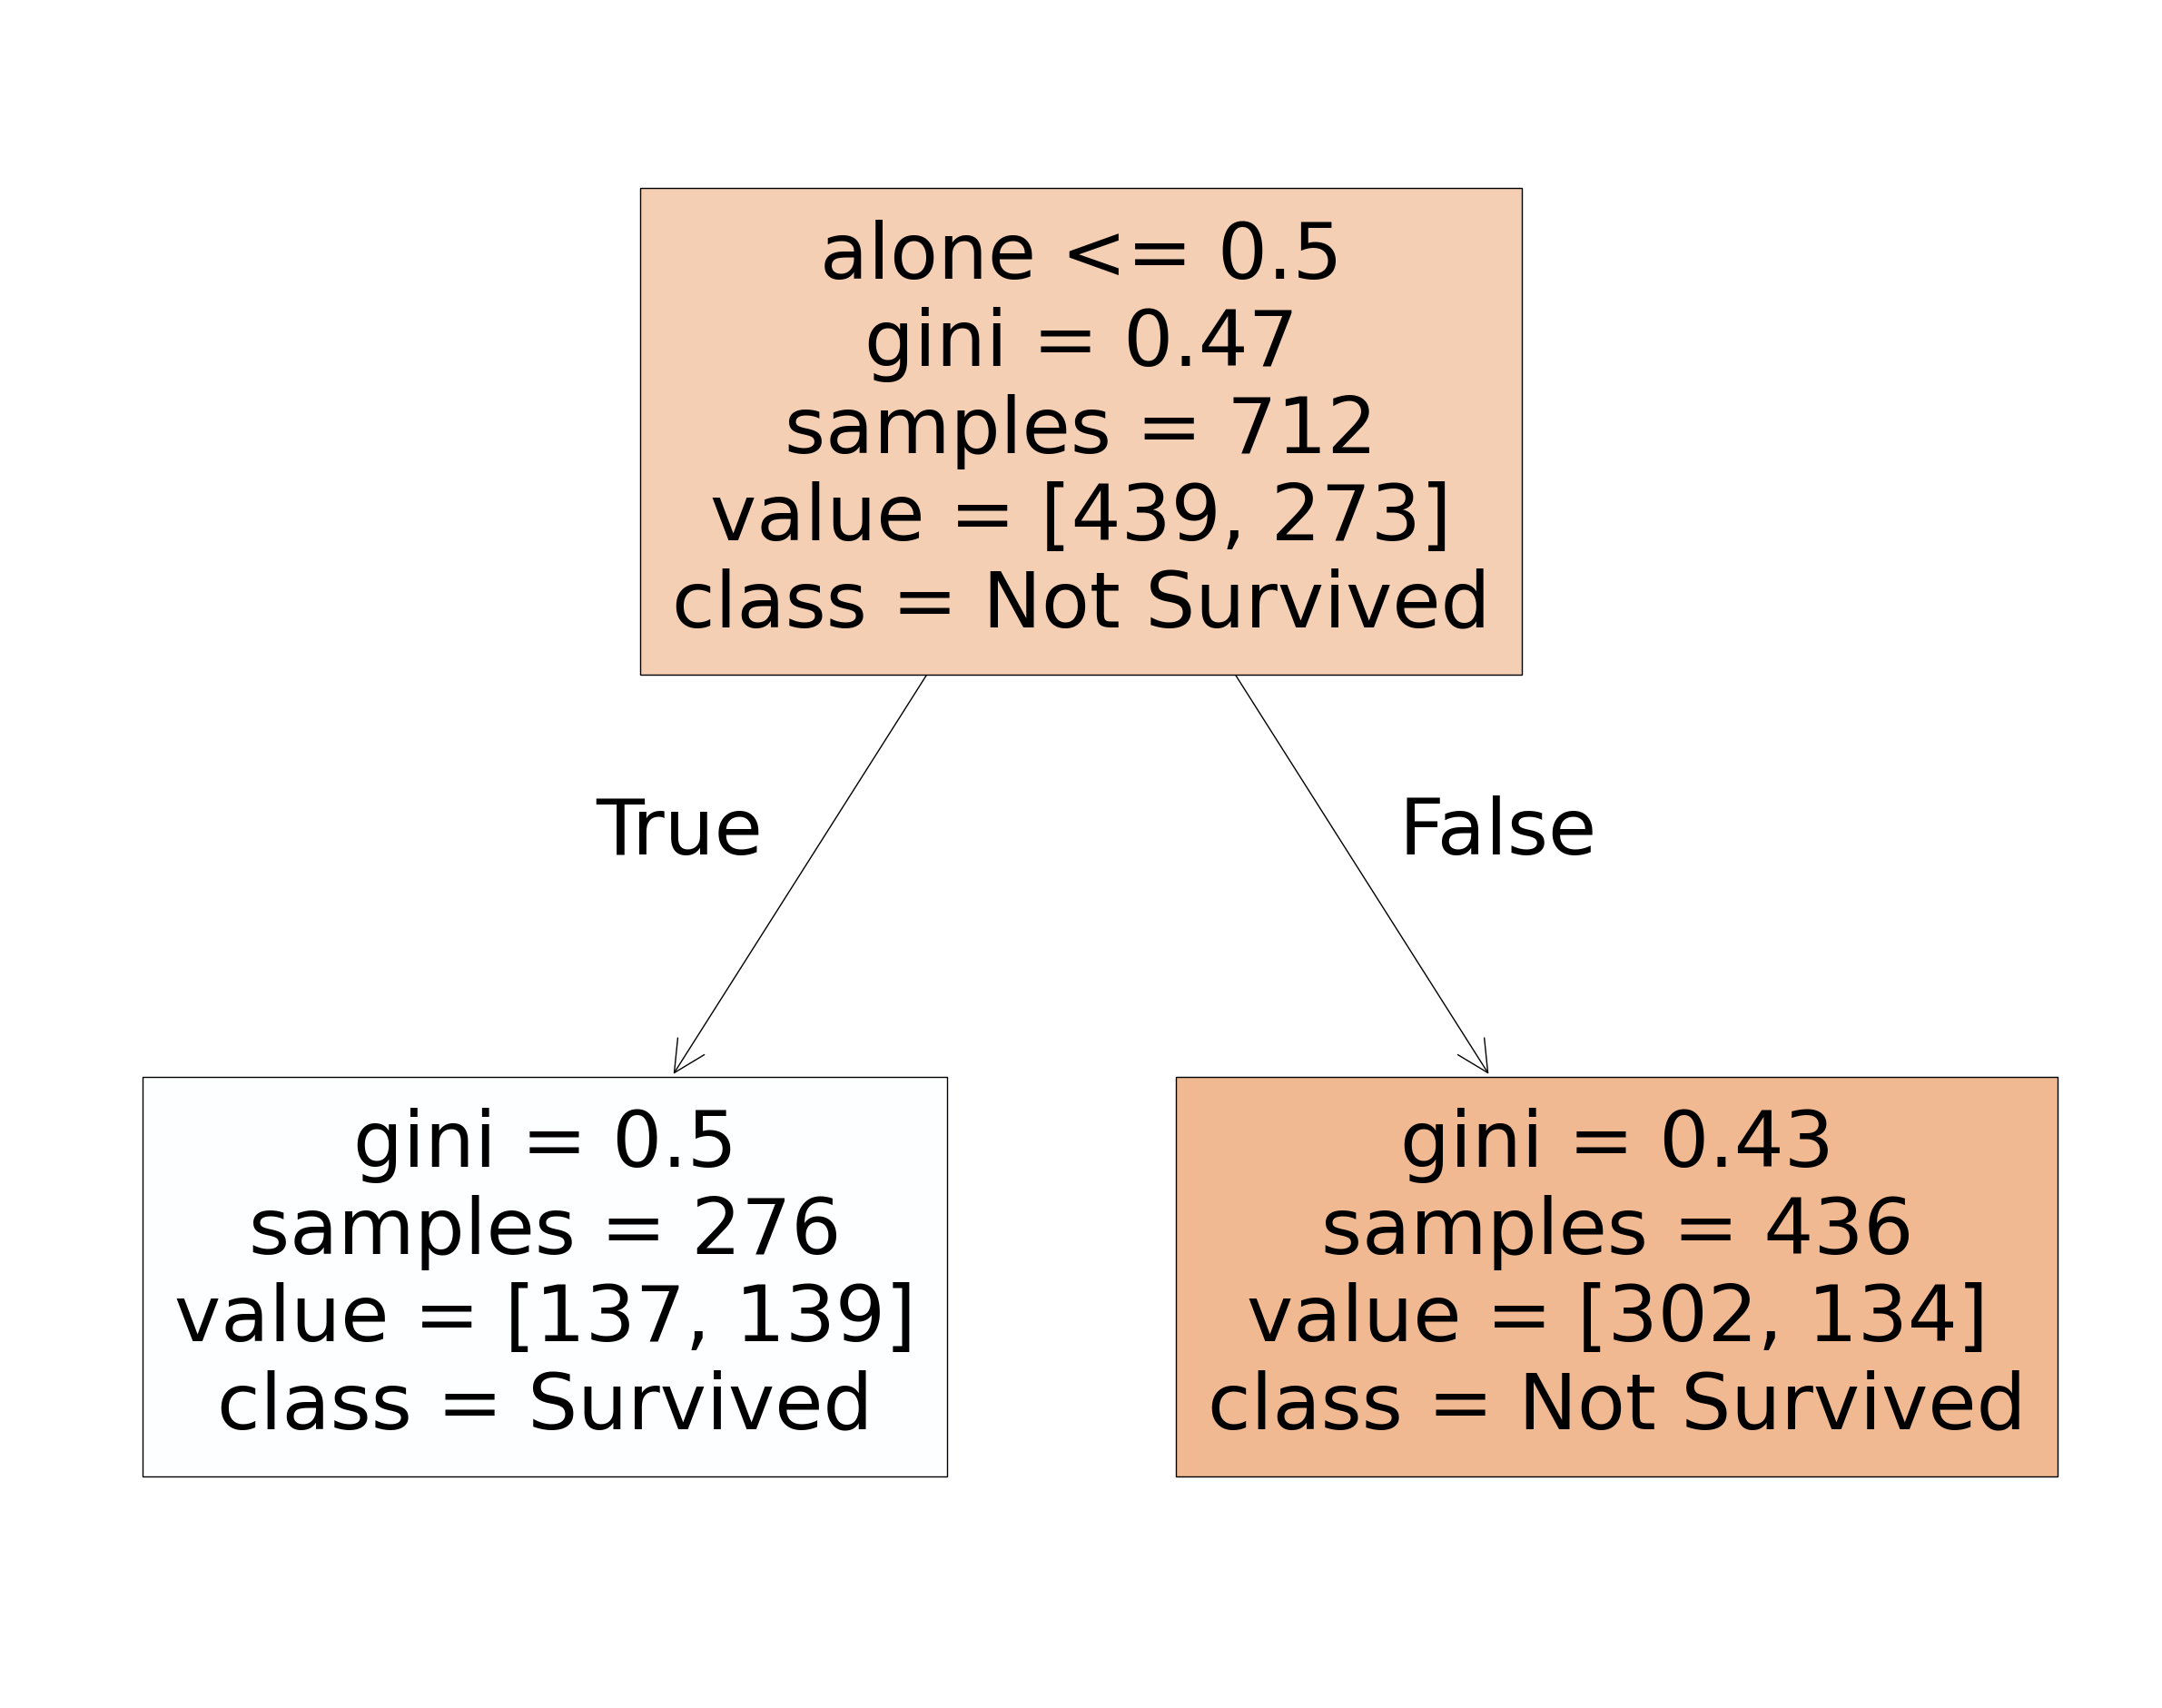

In [19]:
# Create a larger figure with extra height
fig = plt.figure(figsize=(25,20))  # Much taller figure for more vertical space
plt.title(f'Case {case} Decision Tree')

# Use only standard parameters
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], 
          filled=True, precision=2)
          
# Add spacing around the plot using standard methods
plt.tight_layout(pad=5.0)

plt.show()
features_str = '_'.join(X.columns)
target_str = y.name
filename = f"decision_tree_{features_str}_{target_str}.png"
fig.savefig(filename, dpi=400, bbox_inches='tight')

### 4. Reflection

How well did the different cases perform?


Are there any surprising results?


Which inputs worked better? 